# Random Forests
## Instructions:

* Go through the notebook and complete the tasks. 
* Make sure you understand the examples given. If you need help, refer to the Essential readings or the documentation link provided, or go to the Topic 6 discussion forum. 
* Save your notebooks when you are done.
 
**Task 1:**
Run the code below to load the breast cancer diagnosis dataset. Use this data to train and test 1) a decision tree classifier, and then 2) a random forest classifier. Use the scikit-learn classes, ```DecisionTreeClassifier``` and ```RandomForestClassifier``` Compare and contrast the results using the relevant classifier evaluation methods in ```sklearn.metrics```.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import metrics

# Load the breast cancer diagnosis dataset
breast_cancer = datasets.load_breast_cancer()
print(breast_cancer.DESCR)

X = breast_cancer.data
y = breast_cancer.target
feature_names = breast_cancer.feature_names

# separate the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)



.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [19]:
#DECISION TREE
# Creating Decision Tree Classifier "clf"
clf = DecisionTreeClassifier()

# Training "clf"
clf = clf.fit(X_train, y_train)

# Predicting responses for given test dataset
y_pred = clf.predict(X_test)

In [22]:
# RANDOM FOREST
# Creating a Gaussian classifier
clf_forest = RandomForestClassifier(n_estimators=100)

# Training "clf_forest"
clf_forest = clf_forest.fit(X_train, y_train)

# Predicting responses for given test dataset
y_forest_pred= clf_forest.predict(X_test)

In [24]:
# Evaluating accuracy of both models
print("Accuracy Our Decision Tree Classifier:", metrics.accuracy_score(y_test, y_pred))


print("Accuracy Our Random Forest Classifier:", metrics.accuracy_score(y_test, y_forest_pred))

Accuracy Our Decision Tree Classifier: 0.9005847953216374
Accuracy Our Random Forest Classifier: 0.9415204678362573


## Evaluate feature importance
One of the useful things about Random Forests is that they provide a way to automatically evaluate the importance of how much each feature contributes towards the model performance. For more on the random forests ```feature_importance``` method in scikit-learn, see https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

**Task 2** Calculate and print a sorted list of all the features used above. Select the top 10 features,  then use these to train and test a new classifier, and evaluate the result.


In [33]:
import pandas as pd
# Getting list of feature importance as a dataframe
feature_imp = pd.Series(clf_forest.feature_importances_,index=feature_names).sort_values(ascending=False)

# Listing important features based on their contribution to model performance
feature_imp

worst perimeter            0.153203
worst area                 0.137098
worst concave points       0.123139
worst radius               0.108201
mean area                  0.075609
mean concave points        0.074604
mean perimeter             0.060679
mean radius                0.039375
area error                 0.037964
mean concavity             0.037411
worst concavity            0.033241
worst texture              0.012880
mean texture               0.012564
radius error               0.010597
perimeter error            0.009624
worst smoothness           0.009012
worst fractal dimension    0.007441
worst compactness          0.007157
worst symmetry             0.007024
mean fractal dimension     0.006164
texture error              0.005563
fractal dimension error    0.004246
mean compactness           0.004200
mean smoothness            0.003958
concave points error       0.003886
concavity error            0.003603
smoothness error           0.003601
symmetry error             0

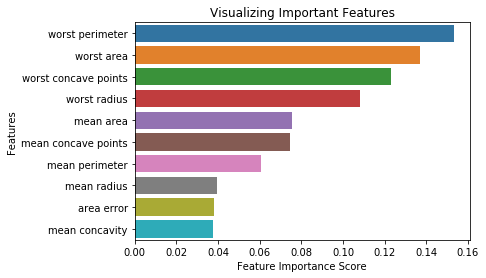

In [37]:
# Checking top 10 most important features with a visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp[0:10], y=feature_imp[0:10].index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

## Training a new Random Forest classifier with selected top 10 features


In [61]:
# To better visualize new dataset to create, let's bring the original dataste to a pandas dataframe format
df3 = pd.DataFrame(np.c_[X, y], columns=np.append(feature_names, ['target']))
df3.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [62]:
# Getting the names of top 10 features
new_features_list= feature_imp[0:10].index.values.tolist()
new_features_list

['worst perimeter',
 'worst area',
 'worst concave points',
 'worst radius',
 'mean area',
 'mean concave points',
 'mean perimeter',
 'mean radius',
 'area error',
 'mean concavity']

In [63]:
# Generating the data set including only the top 10 features we previously selected
X2 = df3[new_features_list]
y2 = df3['target']

# Splitting new dataset into training set and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.3, random_state=4)

In [64]:
# RANDOM FOREST TRAINING WITH TOP 10 FEATURES
# Creating a Gaussian classifier
clf_forest2 = RandomForestClassifier(n_estimators=100)

# Training "clf_forest2"
clf_forest2 = clf_forest2.fit(X2_train, y2_train)

# Predicting responses for given test dataset
y2_forest_pred= clf_forest2.predict(X2_test)

# Evaluating model accuracy
print("Accuracy Our Random Forest Classifier:", metrics.accuracy_score(y2_test, y2_forest_pred))

Accuracy Our Random Forest Classifier: 0.9239766081871345


#### We see that the accuracy of the new classsifier is less than the previos one. This could be explained by the fact that by selecting only top 10 features, we leave out other features which helped to initially get a higher accuracy